### 如何用PyTorch完成实验？

![](http://img.huaiwen.me/20190117122224.png)

## 〇、导入pytorch

In [1]:
import torch

## 一、 构建数据集、加载数据集、预处理数据集

一旦选定了数据集，就要写一些函数去 load 数据集，然后 preprocess 数据集，normalize 数据集， 可以说这是一个实验中占比重最多的部分， 因为：
- 每个数据集的格式都不太一样
- 需要高速 feed data
- 预处理和正则化的方式多种多样
- 其他 · · ·


### 常用数据集
Pytorch 开源了两个项目: vision，和 text，分别对应的 Python 包是torchvision, 和 torchtext。
![](http://img.huaiwen.me/20190117123023.png)
它们受益于众包机制，包含了大量的 dataloader， pre-process 以及 normalize， 分别对应于图像和文本信息。

Vision包下集成好的数据集：

- MNIST
- Fashion-MNIST
- EMNIST
- COCO
- Captions
- Detection
- LSUN
- ImageFolder
- DatasetFolder
- Imagenet-12
- CIFAR
- STL10
- SVHN
- PhotoTour
- SBU
- Flickr
- VOC

可以直接用

In [2]:
import torchvision
minst = torchvision.datasets.MNIST(root="./", download=True)

Processing...
Done!


In [11]:
minst

### Text包
Text下也集成了好多数据集：

- Sentiment Analysis
    - SST
    - IMDb
- Question Classification
    - TREC
- Entailment
    - SNLI
    - MultiNLI
- Language Modeling
    - WikiText-2
    - WikiText103
    - PennTreebank
- Machine Translation
    - Multi30k
    - IWSLT
    - WMT14
- Sequence Tagging
    - UDPOS
    - CoNLL2000Chunking
- Question Answering
    - BABI20

都可以直接用

In [4]:
!pip install torchtext

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
    100% |████████████████████████████████| 71kB 1.1MB/s 


In [5]:
import torchtext

WORD = torchtext.data.Field(init_token="<bos>", eos_token="<eos>")
UD_TAG = torchtext.data.Field(init_token="<bos>", eos_token="<eos>")

train, val, test = torchtext.datasets.UDPOS.splits(fields=(('word', WORD), ('udtag', UD_TAG), (None, None)))

downloading en-ud-v2.zip


en-ud-v2.zip: 100%|██████████| 688k/688k [00:09<00:00, 72.1kB/s]


extracting


In [9]:
print(train.examples[0].word)

['Al', '-', 'Zaman', ':', 'American', 'forces', 'killed', 'Shaikh', 'Abdullah', 'al', '-', 'Ani', ',', 'the', 'preacher', 'at', 'the', 'mosque', 'in', 'the', 'town', 'of', 'Qaim', ',', 'near', 'the', 'Syrian', 'border', '.']


In [10]:
print(train.examples[0].udtag)

['PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT']


### 快速构建自定义数据集
用torch.utils.data 快速构建自定义数据集

In [12]:
import torch.utils.data as Data

x = torch.tensor([1,2,3])
y = torch.tensor([0,0,1])

dataset = Data.TensorDataset(x, y)

In [14]:
dataset.tensors

(tensor([1, 2, 3]), tensor([0, 0, 1]))

In [15]:
for x, y in dataset:
    print(x, y)

tensor(1) tensor(0)
tensor(2) tensor(0)
tensor(3) tensor(1)


### 细粒度构建自定义数据集
继承torch.utils.data.Dataset，然后重载函数__len__和__getitem__来构建

In [16]:
import torch.utils.data as Data
class MyDataset(Data.Dataset):
    def __init__(self):
        # 读取文件之类的
        pass
    def __getitem__(self, index):
        # 获取一个数据
        # 再次可以写预处理
        # 返回一个数据对（x,y）
        pass
    def __len__(self):
        # 返回数据集的大小
        pass

In [17]:
import torch.utils.data as Data

person_1 = ['高','富','帅','有']
person_2 = ['不高','富','帅','有']
person_3 = ['不高','不富','帅','有']
person_4 = ['不高','不富','不帅','无']

person = [person_1, person_2, person_3, person_4]

person

[['高', '富', '帅', '有'],
 ['不高', '富', '帅', '有'],
 ['不高', '不富', '帅', '有'],
 ['不高', '不富', '不帅', '无']]

In [19]:
class SingleDog(Data.Dataset):
    def __init__(self, person):
        self.data = person
        
    def __getitem__(self, index):
        item = self.data[index]
        x = item[:3]
        y = item[-1]
        return x, y
    
    def __len__(self):
        return len(self.data)

In [20]:
single = SingleDog(person)

In [21]:
for index, (x, y)  in enumerate(single):
    print(f"迭代次数: {index}, x :{x}, y:{y}")

迭代次数: 0, x :['高', '富', '帅'], y:有
迭代次数: 1, x :['不高', '富', '帅'], y:有
迭代次数: 2, x :['不高', '不富', '帅'], y:有
迭代次数: 3, x :['不高', '不富', '不帅'], y:无


### 加载数据集
使用torch.utils.data.Dataloader来加载数据集

In [ ]:
tensor_peroson_data_loader = Data.DataLoader(dataset=person_dataset, # 要加载那个数据集
                                             batch_size=batch_size,  # 一批数据有几个样例
                                             shuffle=True,           # 需不需要随机洗牌
                                             sampler=sampler,        # 准备怎么抽样 
                                             collate_fn=my_collate_fn) # 抽出来的样本，准备怎么处理

In [22]:
single_loader = Data.DataLoader(dataset=single, # 要加载那个数据集
                                             batch_size=2)  # 一批数据有几个样例

In [23]:
for index, data  in enumerate(single_loader):
    x, y = data
    print(f"迭代次数: {index}, x :{x}, y:{y}")

迭代次数: 0, x :[('高', '不高'), ('富', '富'), ('帅', '帅')], y:('有', '有')
迭代次数: 1, x :[('不高', '不高'), ('不富', '不富'), ('帅', '不帅')], y:('有', '无')


### 预处理数据集

#### 在Dataset中处理

In [24]:
word2id = {
    '高':1,
    '富':1,
    '帅':1,
    '不高':0,
    '不富':0,
    '不帅':0,
    '有':1,
    '无':0
}

In [26]:
class TensorSingleDog(Data.Dataset):
    def __init__(self, person):
        self.data = person;
    def __getitem__(self, index):
        item = self.data[index]
        new_item = []
        for feature in item:
            new_item.append(word2id[feature])
        x = new_item[:3]
        y = new_item[-1]
        return x, y
        
    def __len__(self):
        return len(self.data)

In [27]:
single = TensorSingleDog(person)
single_loader = Data.DataLoader(dataset=single, batch_size=2) 

In [29]:
for index, data  in enumerate(single_loader):
    x, y = data
    print(f"迭代次数: {index}, x :{x}, y:{y}")

迭代次数: 0, x :[tensor([1, 0]), tensor([1, 1]), tensor([1, 1])], y:tensor([1, 1])
迭代次数: 1, x :[tensor([0, 0]), tensor([0, 0]), tensor([1, 0])], y:tensor([1, 0])


#### 在collate中处理（官方实现）

In [35]:
def my_collate_fn(batch_data):
#     print("---------")
    x_batch = []
    y_batch = []
    for example in batch_data:
        x, y  = example
        x_batch.append(x)
        y_batch.append(y)
    x_batch = torch.tensor(x_batch,dtype = torch.float32)
    y_batch = torch.tensor(y_batch,dtype = torch.float32)
#     print("---------")
    return x_batch, y_batch

In [36]:
single_loader = Data.DataLoader(dataset=single, batch_size=2, collate_fn=my_collate_fn) 

In [38]:
for index, data  in enumerate(single_loader):
    x, y = data
    print(x)
    print(y)


tensor([[1., 1., 1.],
        [0., 1., 1.]])
tensor([1., 1.])
tensor([[0., 0., 1.],
        [0., 0., 0.]])
tensor([1., 0.])


![](http://img.huaiwen.me/20190117122224.png)
## 二、构建模型
需要快速自由地实现你想要的模型，如果你是 CV 方向的你可能想实现一 个 ResNet， 如果你是 NLP 相关的你可能想实现一个 Seq2Seq。 不仅需要宏观粒度的 模块级别的构建， 还有需要非常细粒度的动态的甚至分支循环的情况。

### 经典模型

Pytorch 开源了两个项目: vision，和 text，分别对应的 Python 包是torchvision, 和 torchtext。
![](http://img.huaiwen.me/20190117123023.png)

### TorchVision
支持一些经典模型：
- Alexnet
- VGG
- ResNet
- SqueezeNet
- DenseNet
- Inception v3

#### TorchText
可惜，对于nlp的任务来说，一直也没有一些很统一的模型出来

In [39]:
resnet = torchvision.models.resnet18()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [40]:
import hiddenlayer as hl

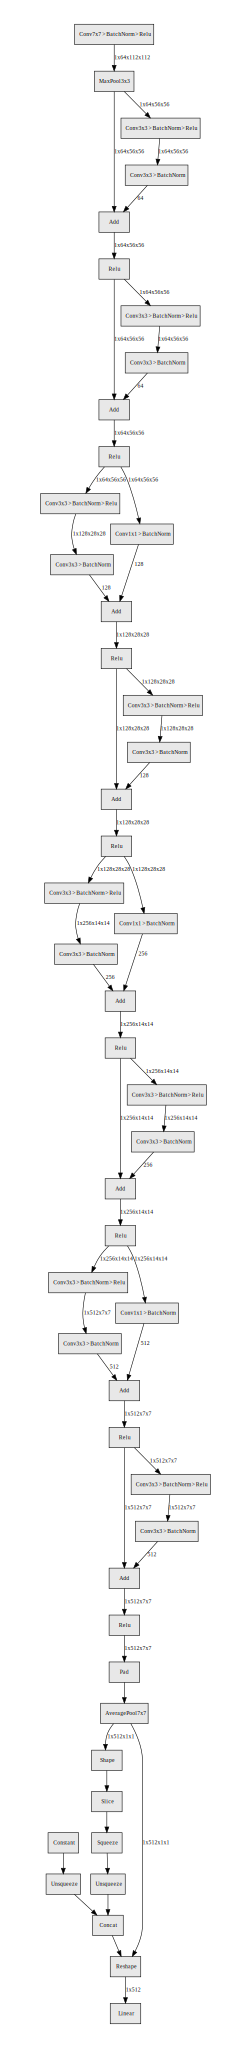

In [41]:
hl.build_graph(resnet, torch.randn([1, 3, 224, 224]))

### 加载别人的模型
使用torch.hub.load(),来加载别人的模型

这个函数特别有意思：
torch.hub.load(github, model, force_reload=False)

** Load a model from a github repo, with pretrained weights.**

需要写github的那个人，在根目录放一个配置文件：hubconf.py

很尴尬，我至今没找到这样的库

### 快速构架自己的神经网络结构

In [42]:
my_net = torch.nn.Sequential(
   torch.nn.Linear(1, 10),
    torch.nn.ReLU(inplace=True),
    torch.nn.Linear(10,1)
)

In [43]:
my_net

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU(inplace)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
my_net(torch.randn([10, 1]))

tensor([[-0.2112],
        [-0.2212],
        [-0.1366],
        [-0.2068],
        [-0.1522],
        [-0.1979],
        [-0.1605],
        [-0.2122],
        [-0.1121],
        [-0.2027]], grad_fn=<ThAddmmBackward>)

### 快速构建多层


In [46]:
hun_layer = [torch.nn.Linear(10, 10) for _ in range(100)]

In [47]:
hun_layer

[Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=True),
 Linear(in_features=10, out_features=10, bias=

### 深度自定义

In [50]:
import torch.nn as nn

In [51]:
class MyNET(nn.Module):
    def __init__(self):
        super(MyNET, self).__init__()
        pass

    def forward(self, x):
        pass

In [58]:
class SingleDogCls(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(SingleDogCls, self).__init__()
        
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.relu = nn.ReLU()
        self.predict = nn.Linear(n_hidden, n_output)


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.predict(x)
        return x

In [54]:
person

[['高', '富', '帅', '有'],
 ['不高', '富', '帅', '有'],
 ['不高', '不富', '帅', '有'],
 ['不高', '不富', '不帅', '无']]

In [60]:
will_u_be_single = SingleDogCls(n_feature=3, n_hidden=10, n_output=1)

In [62]:
will_u_be_single

SingleDogCls(
  (hidden): Linear(in_features=3, out_features=10, bias=True)
  (relu): ReLU()
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

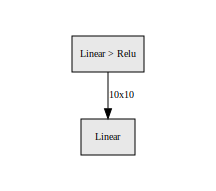

In [63]:
hl.build_graph(will_u_be_single, torch.randn([10, 3]))

In [65]:
for index, data in enumerate(single_loader):
    print(f"迭代次数{index}")
    print(f"data:{data}")
    input_x, ground_truth = data
    predict = will_u_be_single(input_x)
    print(predict, ground_truth)
    

迭代次数0
data:(tensor([[1., 1., 1.],
        [0., 1., 1.]]), tensor([1., 1.]))
tensor([[0.4994],
        [0.5929]], grad_fn=<ThAddmmBackward>) tensor([1., 1.])
迭代次数1
data:(tensor([[0., 0., 1.],
        [0., 0., 0.]]), tensor([1., 0.]))
tensor([[0.4088],
        [0.3349]], grad_fn=<ThAddmmBackward>) tensor([1., 0.])


## 三、定义损失
度量，模型算出来的predict,和你的ground_truth之间的差距

一般用损失函数来度量。
损失函数极其重要，如果度量的不准，那个整个模型学习的方向就会有偏差。
官方定义的损失函数在目前有两个地方:
- torch.nn
- torch.nn.functional

torch.nn下面的loss函数,是作为模型的一部分存在的,实际上是torch.nn.functional下loss函数的封装,它实际上还是调用了torch.nn.functional下的函数.

In [66]:
import torch.nn.functional as F

In [ ]:
class L1Loss(_Loss):
    __constants__ = ['reduction']

    def __init__(self, size_average=None, reduce=None, reduction='mean'):
        super(L1Loss, self).__init__(size_average, reduce, reduction)

    @weak_script_method
    def forward(self, input, target):
        return F.l1_loss(input, target, reduction=self.reduction)

In [68]:
a = torch.tensor(2.)
b = torch.tensor(5.)

F.l1_loss(a, b) # |a - b|

tensor(3.)

In [69]:
F.mse_loss(a, b) # 

tensor(9.)

简单的两个数列之间的距离,可以用l1,或者mse搞定,但是,如果是两个分布,怎么度量呢? 两个图像? 两个类别? 其实也差不多

torch.nn.functional下面,有如下这么多的损失函数:

- binary_cross_entropy
- binary_cross_entropy_with_logits
- poisson_nll_loss
- cosine_embedding_loss
- cross_entropy
- ctc_loss
- hinge_embedding_loss
- kl_div
- l1_loss
- mse_loss
- margin_ranking_loss
- multilabel_margin_loss
- multilabel_soft_margin_loss
- multi_margin_loss
- nll_loss
- smooth_l1_loss
- soft_margin_loss
- triplet_margin_loss

足够日常使用了,但是,如果你需要的loss,官方没有
你有两个办法实现自己的loss function

- 继承torch.nn.module实现loss
- 继承torch.autograd.function 实现loss
区别在于,你想把你的这个loss,当做什么:
![](http://img.huaiwen.me/20190118130347.png)


实质上的区别是,你这个loss的反向传播,你准备让谁做.
> 官方实现：loss是一个module 

### 继承torch.nn.module实现loss

In [ ]:
class MyNET(nn.Module):
    def __init__(self):
        super(MyNET, self).__init__()
        pass

    def forward(self, x):
        pass

In [70]:
class MyLoss(nn.Module):
    def __init__(self):
        super(MyLoss, self).__init__()

    def forward(self, x, y):
        return x * 100  - y

In [71]:
loss = MyLoss()

In [73]:
loss(a, b)

tensor(195.)

In [74]:
a

tensor(2.)

In [75]:
b

tensor(5.)

### 继承torch.autograd.function 实现loss

In [ ]:
from torch.autograd import Function

In [ ]:
class MyLossFunction(Function):
    def forwoard(input_tensor):
        pass
    def backward(grad_output):
        pass

In [118]:
class MyLossFunc(torch.autograd.Function):

    def forward(self, input_a, input_b):
        return 2 * (input_a - input_b)

    def backward(self, grad_output):
        print("___")
        return grad_output * 2, -grad_output *2

In [119]:
a = torch.tensor(1., requires_grad = True)
b = torch.tensor(2., requires_grad = True)

In [120]:
f_loss = MyLossFunc()

In [121]:
c = f_loss(a, b)
c

tensor(-2., grad_fn=<MyLossFunc>)

In [122]:
c.backward()

___


In [123]:
a.grad

tensor(2.)

In [124]:
b.grad

tensor(-2.)

$$ c = 2 * (a - b) $$

## 四、实现优化算法

Pytorch 集成了常见的优化算法，包括:
- torch.optim.Adadelta
- torch.optim.Adagrad
- torch.optim.Adam
- torch.optim.SparseAdam
- torch.optim.Adamax
- torch.optim.LBFGS
- torch.optim.RMSprop
- torch.optim.Rprop
- torch.optim.SGD



In [91]:
from torch.optim import Optimizer

In [93]:
optimizer = torch.optim.SGD(will_u_be_single.parameters(), lr=0.05, momentum=0.9)

如果你需要自定义优化算法, 也可以继承torch.optim.Optimizer，通过实现其中的部分方法如step等，来优化模型的参数。

In [ ]:
from torch.optim import Optimizer
class MyOptimizer(Optimizer):
    def step(self,closure=None):
        # 每一次是怎么优化的
        pass

### 调整学习率

pytorch官方,提供了torch.optim.lr_scheduler类来基于动态调整学习率

- torch.optim.lr_scheduler.LambdaLR
- torch.optim.lr_scheduler.StepLR
- torch.optim.lr_scheduler.MultiStepLR
- torch.optim.lr_scheduler.ExponentialLR
- torch.optim.lr_scheduler.CosineAnnealingLR
- torch.optim.lr_scheduler.ReduceLROnPlateau

In [94]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [ ]:
一开始lr=0.05
lr = 0.05     if epoch < 30
lr = 0.005    if 30 <= epoch < 60
lr = 0.0005   if 60 <= epoch < 90

## 五、迭代训练

In [107]:
import torch
import torch.utils.data as Data

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Optimizer
from torch.optim.lr_scheduler import StepLR


# 从前,有个数据表
person_1 = ['高','富','帅','有']
person_2 = ['不高','富','帅','有']
person_3 = ['不高','不富','帅','有']
person_4 =['不高','不富','不帅','无']
person = [person_1, person_2, person_3, person_4]

# 有个数据转换字典
word2id = {
    '高':1,
    '富':1,
    '帅':1,
    '不高':0,
    '不富':0,
    '不帅':0,
    '有':1,
    '无':0
}

# 将数据表进行封装
class ManDataset(Data.Dataset):
    def __init__(self, person):
        self.data = person;
    def __getitem__(self, index):
        item = self.data[index]
        new_item = []
        for feature in item:
            new_item.append(word2id[feature])
        x = new_item[:3]
        y = new_item[-1]
        return x, y
        
    def __len__(self):
        return len(self.data)

# 对数据进行预处理
def my_collate_fn(batch_data):
    x_batch = []
    y_batch = []
    for example in batch_data:
        x, y  = example
        x_batch.append(x)
        y_batch.append(y)
    x_batch = torch.tensor(x_batch,dtype = torch.float32)
    y_batch = torch.tensor(y_batch,dtype = torch.float32)
    return x_batch, y_batch

# 创建数据集实例
person_dataset = ManDataset(person)
# 创建加载器,加载数据集
batch_size = 2
peroson_data_loader = Data.DataLoader(dataset=person_dataset, 
                                      batch_size=batch_size,  
                                      collate_fn=my_collate_fn)


# 实现模型
class SingleDog(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(SingleDog, self).__init__()
        
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.relu = nn.ReLU()
        self.predict = nn.Linear(n_hidden, n_output)


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.predict(x)
        return x
    
# 创建模型实例
will_u_be_single = SingleDog(n_feature=3, n_hidden=10, n_output=1)

# 创建Loss 函数
single_loss = nn.L1Loss()

# 创建优化器
optimizer = torch.optim.SGD(will_u_be_single.parameters(), lr=0.05, momentum=0.9)

# 根据epoch,自动更新优化器的参数
scheduled_optimizer = StepLR(optimizer, step_size=10, gamma=0.1)

# 开始迭代训练
total_epoch = 100
for epoch in range(total_epoch):
    for index, data in enumerate(peroson_data_loader):
        input_x, ground_truth = data
        predict = will_u_be_single(input_x)
        loss = single_loss(predict.squeeze(), ground_truth)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduled_optimizer.step()

    print(f"Epoch {epoch}, loss: {loss.item()}, current lr:{scheduled_optimizer.get_lr()}")


Epoch 0, loss: 0.40858253836631775, current lr:[0.05]
Epoch 1, loss: 0.3645174503326416, current lr:[0.05]
Epoch 2, loss: 0.5424787998199463, current lr:[0.05]
Epoch 3, loss: 0.6483826637268066, current lr:[0.05]
Epoch 4, loss: 0.29630768299102783, current lr:[0.05]
Epoch 5, loss: 0.2980116605758667, current lr:[0.05]
Epoch 6, loss: 0.3198118507862091, current lr:[0.05]
Epoch 7, loss: 0.2896440625190735, current lr:[0.05]
Epoch 8, loss: 0.2305247038602829, current lr:[0.05]
Epoch 9, loss: 0.19246754050254822, current lr:[0.05]
Epoch 10, loss: 0.21768486499786377, current lr:[0.005000000000000001]
Epoch 11, loss: 0.17024391889572144, current lr:[0.005000000000000001]
Epoch 12, loss: 0.1743328720331192, current lr:[0.005000000000000001]
Epoch 13, loss: 0.17746058106422424, current lr:[0.005000000000000001]
Epoch 14, loss: 0.17987018823623657, current lr:[0.005000000000000001]
Epoch 15, loss: 0.15041883289813995, current lr:[0.005000000000000001]
Epoch 16, loss: 0.08859486877918243, curre

#### 测试一下

In [109]:
will_u_be_single(torch.tensor([0.,1.,0.]))

tensor([0.0875], grad_fn=<ThAddBackward>)

## 六、加速计算
加速计算,最快的办法,就是把数据和模型放到GPU上跑

In [110]:
torch.cuda.is_available()

True

In [112]:
will_u_be_single.cuda()

SingleDog(
  (hidden): Linear(in_features=3, out_features=10, bias=True)
  (relu): ReLU()
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# 创建模型实例
will_u_be_single = SingleDog(n_feature=3, n_hidden=10, n_output=1)

##########
will_u_be_single.cuda()
##########


# 创建Loss 函数
single_loss = nn.L1Loss()

# 创建优化器
optimizer = torch.optim.SGD(will_u_be_single.parameters(), lr=0.05, momentum=0.9)

# 根据epoch,自动更新优化器的参数
scheduled_optimizer = StepLR(optimizer, step_size=10, gamma=0.1)

# 开始迭代训练
total_epoch = 100
for epoch in range(total_epoch):
    for index, data in enumerate(peroson_data_loader):
        input_x, ground_truth = data
        
        #########
        input_x = input_x.cuda()
        ground_truth = ground_truth.cuda()
        #########
        
        predict = will_u_be_single(input_x)
        loss = single_loss(predict, ground_truth)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduled_optimizer.step()

## 七、存储和加载模型

保存和加载整个模型, 包括: 网络结构, 模型参数等

In [113]:
torch.save(will_u_be_single, "./will_you_be_single.pkl")

/home/huaiwen/anaconda3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type SingleDog. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [116]:
model_from_file = torch.load('./will_you_be_single.pkl')

保存和加载网络中的参数

In [115]:
torch.save(will_u_be_single.state_dict(), "./will_you_be_single_2.pkl")

In [117]:
model_parameter = torch.load('./will_you_be_single_2.pkl')
will_u_be_single.load_state_dict(model_parameter)